In [64]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division, print_function
from vpython import *

zi, zf = 20, 0
zdoti = 1
ri = 30
rf = ri
rdoti = 1
phi0 = 0
phi = phi0
phidot = 2
m = 0.3
q = 700
L = m*(ri**2)*phidot

k = 1
lamb = 1
Lrod = 160 
Ez = lambda z,r: k*lamb*((1/(z**2 + r**2)**.5) - (1/((Lrod - z)**2 + r**2)**.5))
Er = lambda z,r: (k/r)*lamb*((z/(z**2 + r**2)**.5) + ((Lrod - z)/((Lrod - z)**2 + r**2)**.5))

def vfinal(vi,F,dt):
    vf = vi + F*dt/m
    return vf
    
def vaverage(vf,vi):
    vavg = (vf + vi)/2
    return vavg
    
def posfinal(xi,vavg,dt):
    xf = xi + vavg*dt
    return xf

In [65]:
n = 10000
dt = .01
rpos = np.zeros(n)
zpos = np.zeros(n)
phipos = np.zeros(n)
a = .0002
d = 1
i = 0
while i<n:
    if ri<4:
        crash = i
        i = n
    else:
        Fc = m*ri*phidot**2
        Fr = -q*Er(zi,ri)-d*Er(zi,ri)**2
        Fz = q*Ez(zi,ri)+d*Ez(zi,ri)**2
        Ffr = -a*rdoti**2
        Ffz = -a*zdoti**2

        rdotf = vfinal(rdoti,Fc+Fr+Ffr,dt)
        rdotavg = vaverage(rdotf,rdoti)
        rf = posfinal(ri,rdotavg,dt)

        zdotf = vfinal(zdoti,Fz+Ffz,dt)
        zdotavg = vaverage(zdotf,zdoti)
        zf = posfinal(zi,zdotavg,dt)

        phidotf = L/(m*rf**2) - a*phidot**2
        phidotavg = vaverage(phidotf,phidot)
        phi = posfinal(phi,phidotavg,dt)

        rpos[i] = rf
        zpos[i] = zf
        phipos[i] = np.remainder(phi,2*np.pi)

        ri = rf
        zi = zf    
        rdoti = rdotf
        zdoti = zdotf
        phidot = phidotf
        L = phidotf*m*rf**2
        i = i + 1
    



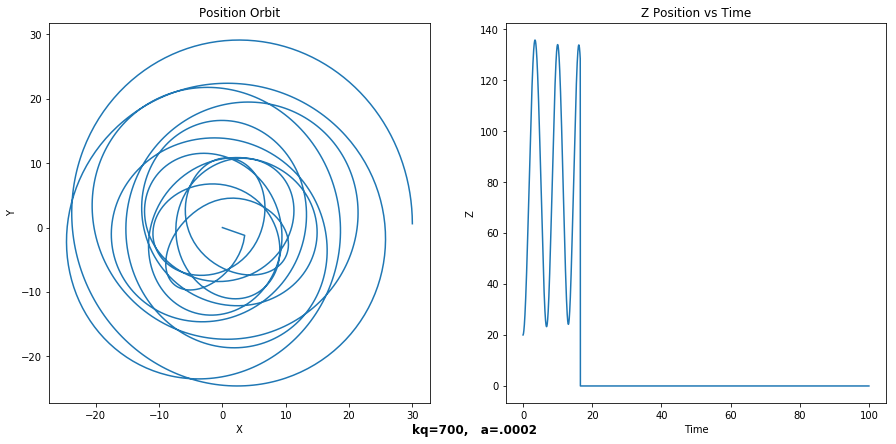

In [71]:
domain = np.linspace(0,n*dt,n)
x = rpos*np.cos(phipos)
y = rpos*np.sin(phipos)
plt.figure(figsize=(15,7))
ax = plt.subplot(121)
ax.text(30, -32, 'kq=700,   a=.0002',fontsize = 12, fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,y)
plt.title('Position Orbit')
plt.subplot(122)
plt.xlabel('Time')
plt.ylabel('Z')
plt.title('Z Position vs Time')
plt.plot(domain,zpos)
plt.savefig('orbitplots1.png')
plt.show()

In [4]:
scene = canvas(title='scene', center=vector(0,0,Lrod/2))

mysphere = sphere(pos=vector(0,0,0),color=vector(0,1,1),make_trail=True,retain = 40)
cylinder(pos=vector(0,0,0),axis=vector(0,0,Lrod),radius=2)
n=10000
i = 0
while i<n:
    rate(100)
    mysphere.pos.x = x[i]
    mysphere.pos.y = y[i]
    mysphere.pos.z = zpos[i]
    i = i + 1

print("end of program")

<IPython.core.display.Javascript object>

end of program


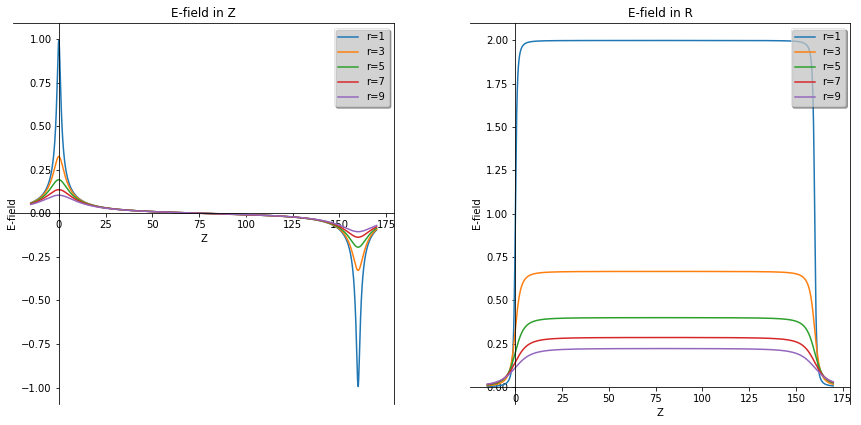

In [72]:


t1 = np.arange(-15.0, Lrod+10, 0.1)

plt.figure(figsize=(15,7))
ax = plt.subplot(121)
for n in np.arange(1,10,2):
    plt.plot(t1, Ez(t1,n), label="r=%d"%(n,))
plt.title("E-field in Z")
leg = plt.legend(loc=1, ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xlabel('Z')
ax.set_ylabel('E-field')

ax = plt.subplot(122)
for n in np.arange(1,10,2):
    plt.plot(t1, Er(t1,n), label="r=%d"%(n,))
plt.title("E-field in R")
leg = plt.legend(loc=1, ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xlabel('Z')
ax.set_ylabel('E-field')

plt.savefig('efield.png')
plt.show()
